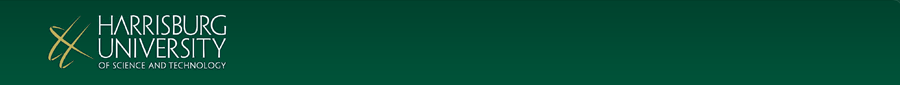
<br>
# CISC 340
# Introduction to Artificial Intelligence
## Lab Booklet #04
## Lab Title: Supervised Learning
***
### **Instructors**
### Brian Grey M.S.
### Chad Van Chu M.S.
***

# Objectives
#### Supervised learning is the "entry level" approach to machine learning. In order to effectively do supervised learning, we need a data set which has already been labeled for us and an approach we need to take. In this lab, we will be examing two different approaches to supervised learning. We will be implementing a probablisitic approach using the Naive Bayes classifier and a decision tree approch using the ID3 learning algorithm.

#### After completing this lab, you will be able to:

- __Understand how to run the calculations for a Naive Bayes classifier__
- __Understand how to implement the ID3 learning algorithm__
- __Be able to compare and contrast the output from each approach__

# Resources
#### While the lab will explain everything that you need to know, you may want to consult the following sources for additional knowledge:

- [https://en.wikipedia.org/wiki/Naive_Bayes_classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [https://en.wikipedia.org/wiki/ID3_algorithm](https://en.wikipedia.org/wiki/ID3_algorithm)

# Deliverables
#### For this lab, you will need to submit:

- Jupyter notebook files (.ipynb), named and coded as instructed. 
  - CISC 340 Lab 04 FA19.ipynb
  - Excel Spreadsheet if you choose to use it for PART 1.

# Instructions & Questions
We have provided a data set for this lab, `<your name> Lab04Data.xlsx`, that you will need to use for both parts of the lab. You can find this data file under the Lab 4 drop box on Moodle as a feedback file. Part 1 will involve running calculations in Excel. <b>Be sure NOT to alter the underlying data and be sure that your data is unaltered for Part 2.</b>

# <u>Part 1: Naive Bayes Classifier</u>

Naive bayes classifiers work with Bayes' Theorem. Where we can calculate the posterior probability of an event occuring given that some other event has occured from the likelihood, prior probability, and normalizing constant (evidence) of those events.

Bayes' theorem
--------------
$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

<br>Before constructing any model, let's begin by opening the data file provided to you in the instructions to familiarize ourselves with the data we are going to be working with. The class label in our datasets will always be the left most column, in this case **play**.

#### 1. What are the features that are present? How many records do you have present?

There are 5 features total for each entry in the data set: outlook, tempature, humidity windy, and play. We will use our theorem to figure out how the first 4 features allow us to determine if we will play or not . There are 99 records present.


#### 2. Using the dataset, calculate the probablities of each of your present features given the class and also the probablilty of just the class. You may do this using a program or using just the excel spreadsheet provided. Whichever method you choose, be sure that the probabilities are clearly shown in order to get credit.

<font color='red'>Type answer here!</font>

#### 3. Using your now "trained" model from Question 2, use those calculations to calculate what class the following new records would have. Show your calculations. (Be sure to not recalculate your probabilities, you already did that in part 2):

| Outlook | Temperature | Humidity | Windy | Play |
| --- | --- | --- | --- | --- |
| Sunny | Mild | Normal | False | No|
| Overcast | Hot | Normal | True | Yes |
| Rainy | Hot | High | True | No|


<br><font color='red'>Note:</font> Feel free to edit this Markdown and replace the "---" with the actual class. But also remember you MUST include your calculations through provided code OR spreadsheet.

In [6]:
#Write code here if you wish to use programming instead of Excel. 
'''Extra Credit will be awarded if you choose to program the 
    calculations instead of using the excel spreadsheet.'''

# <u>Part 2: ID3 Decision Tree</u>


#### 4. Create an object called `ID3` that will contain your trained classifier. This object should have 3 publicly visible methods:
- __`train(rawData)`: Method which takes the raw data as a parameter and trains the decision tree.__
- __`classify(record)`: Method which takes a record which the method will classify. It should return this classification.__
- __`displayTree()`: Method which displays to screen the decision tree which was trained.__

#### You have flexibility within your code on how things are passed or displayed, but be sure to meet the design requirements. Private helper methods may be declared but should be declared and commented appropriately.

In [252]:
import math
import copy
class ID3:
    def __init__(self):
        self._tree = []
        self._names = []
    def entropy(self, first,sec):
        if first == 0 or sec == 0:
            return 0
        else:
            tot = first + sec
            temp1 = first/tot
            temp2 = sec/tot
            return ((-temp1 * math.log(temp1,2)) - (temp2 * math.log(temp2,2))) 
    def train(self, rawData):
        self._tree = []
        names = rawData[0]
        self._names = copy.deepcopy(rawData[0])
        tot = 0
        check = True
        state1 =[]
        for x in range(len(names)):
            state1.append([])

        for record in rawData:
            if check:
                check = False
            else:
                tot += 1
                pos = 0
                for entry in record:
                    check1 = True
                    for x in state1[pos]:
                        if entry == x[0]:
                            check1 = False
                    if check1:
                        state1[pos].append([entry, 0])
                    pos += 1
                    
                    
        state2 = copy.deepcopy(state1)
        state1qual = state1[-1][0][0]
        for record in rawData:
            if check:
                check = False
            else:
                pos = 0
                for entry in record:
                    if record[-1] == state1qual:
                        for x in state1[pos]:
                            if entry == x[0]:
                                x[1] += 1
                        pos += 1
                    else:
                        for x in state2[pos]:
                            if entry == x[0]:
                                x[1] += 1
                        pos += 1
        infgain = []
        for x in range(len(names)-1):
            infgain.append(self.entropy(state1[-1][0][1] + state2[-1][0][1], state1[-1][1][1] + state2[-1][1][1]))
        for x in range(len(names)-1):
            for y in range(len(state1[x])):
                infgain[x] -= ((state1[x][y][1] + state2[x][y][1])/tot) *  self.entropy(state1[x][y][1],state2[x][y][1])
        brk = [None,0]
        pos = 0
        for x in infgain:
            if x > brk[1]:
                brk = [names[pos],x,pos]
            pos += 1
        split = []
        for x in state1[brk[2]]:
            split.append(x[0])
        newData = []
        for x in split:
            newData.append([])
        for record in rawData:
            pos = 0
            for feature in split:
                if record[brk[2]] == feature:
                    del record[brk[2]]
                    newData[pos].append(record)
                    break
                pos += 1
        del names[brk[2]]
        
        for x in newData:
            x.insert(0,names)
        pos = 0
        for x in range(len(split)):
            self.trainhelp(copy.deepcopy(newData[x]),brk[0] + " " + split[x])
            pos += 1
        newtree = []
        for x in self._tree:
            newtree.append(x.split(" "))
        self._tree = newtree
        return self._tree
                
                
            
    def trainhelp(self,rawData,path):
        names = rawData[0]
        tot = 0
        check = True
        state1 =[]
        for x in range(len(names)):
            state1.append([])

        for record in rawData:
            if check:
                check = False
            else:
                tot += 1
                pos = 0
                for entry in record:
                    check1 = True
                    for x in state1[pos]:
                        if entry == x[0]:
                            check1 = False
                    if check1:
                        state1[pos].append([entry, 0])
                    pos += 1  

        state2 = copy.deepcopy(state1)
        state1qual = state1[-1][0][0]
        for record in rawData:
            if check:
                check = False
            else:
                pos = 0
                for entry in record:
                    if record[-1] == state1qual:
                        for x in state1[pos]:
                            if entry == x[0]:
                                x[1] += 1
                        pos += 1
                    else:
                        for x in state2[pos]:
                            if entry == x[0]:
                                x[1] += 1
                        pos += 1
        infgain = []
        if len(names) <= 2:
            split = []
            for x in state1[0]:
                split.append(x[0])
            for x in range(len(state1[0])):
                if state1[0][x][1] > state2[0][x][1]:
                    self._tree.append(path + " " +  names[0] + " " +  state1[0][x][0] + " " + names[1] + " " + "No")
                else:
                    self._tree.append(path + " " +  names[0] + " " +  state1[0][x][0] + " " + names[1] + " " + "Yes")
                    
        else:
            if len(state1[-1]) == 1:
                 self._tree.append(path + " " + names[-1] + " " + state1[-1][0][0])
            else:
                for x in range(len(names)-1):
                    infgain.append(self.entropy(state1[-1][0][1] + state2[-1][0][1], state1[-1][1][1] + state2[-1][1][1]))
                for x in range(len(names)-1):
                    for y in range(len(state1[x])):
                        infgain[x] -= ((state1[x][y][1] + state2[x][y][1])/tot) *  self.entropy(state1[x][y][1],state2[x][y][1])
                brk = [None,0]
                pos = 0
                for x in infgain:
                    if x > brk[1]:
                        brk = [names[pos],x,pos]
                    pos += 1
                split = []
                for x in state1[brk[2]]:
                    split.append(x[0])
                newData = []
                for x in split:
                    newData.append([])
                for record in rawData:
                    pos = 0
                    for feature in split:
                        if record[brk[2]] == feature:
                            del record[brk[2]]
                            newData[pos].append(record)
                            break
                        pos += 1
                del names[brk[2]]

                for x in newData:
                    x.insert(0,names)
                pos = 0
                for x in range(len(split)):
                    self.trainhelp(copy.deepcopy(newData[x]),path + " "+ brk[0] + " " + split[x])
                    pos += 1

                
                    
        
            
    def classify(self, record):
        assign = {}
        pos = 0 
        for name in self._names:
            assign[name] = record[pos]
            pos += 1
        for x in self._tree:
            check = True
            pos = 0
            for y in x:
                for z in self._names:
                    if y == z:
                        if pos + 1 != len(x) -1:
                            if assign[y] != x[pos + 1]:
                                check = False
                pos += 1
            if check == True:
                return x[-1]
                        


    def displayTree(self):
        
        for x in self._tree:
            pos = 0
            state = True
            for y in x:
                if pos == (len(x) - 2):
                    print("In This Case " + y,end =" is " )
                elif pos == (len(x) - 1):
                    print(y)
                elif state:
                    print("If " + y,end =" Is " )
                    state = False
                else:
                    print(y,end =" and " )
                    state = True
                pos += 1


#### 5. Provide code that runs the training algorithm for training based on your provided data. Use the records from Question 3 to classify each record. Finally, output your decision tree.

In [251]:
import math
import copy
class ID3:
    def __init__(self):
        self._tree = []
        self._names = []
    def entropy(self, first,sec):
        if first == 0 or sec == 0:
            return 0
        else:
            tot = first + sec
            temp1 = first/tot
            temp2 = sec/tot
            return ((-temp1 * math.log(temp1,2)) - (temp2 * math.log(temp2,2))) 
    def train(self, rawData):
        self._tree = []
        names = rawData[0]
        self._names = copy.deepcopy(rawData[0])
        tot = 0
        check = True
        state1 =[]
        for x in range(len(names)):
            state1.append([])

        for record in rawData:
            if check:
                check = False
            else:
                tot += 1
                pos = 0
                for entry in record:
                    check1 = True
                    for x in state1[pos]:
                        if entry == x[0]:
                            check1 = False
                    if check1:
                        state1[pos].append([entry, 0])
                    pos += 1
                    
                    
        state2 = copy.deepcopy(state1)
        state1qual = state1[-1][0][0]
        for record in rawData:
            if check:
                check = False
            else:
                pos = 0
                for entry in record:
                    if record[-1] == state1qual:
                        for x in state1[pos]:
                            if entry == x[0]:
                                x[1] += 1
                        pos += 1
                    else:
                        for x in state2[pos]:
                            if entry == x[0]:
                                x[1] += 1
                        pos += 1
        infgain = []
        for x in range(len(names)-1):
            infgain.append(self.entropy(state1[-1][0][1] + state2[-1][0][1], state1[-1][1][1] + state2[-1][1][1]))
        for x in range(len(names)-1):
            for y in range(len(state1[x])):
                infgain[x] -= ((state1[x][y][1] + state2[x][y][1])/tot) *  self.entropy(state1[x][y][1],state2[x][y][1])
        brk = [None,0]
        pos = 0
        for x in infgain:
            if x > brk[1]:
                brk = [names[pos],x,pos]
            pos += 1
        split = []
        for x in state1[brk[2]]:
            split.append(x[0])
        newData = []
        for x in split:
            newData.append([])
        for record in rawData:
            pos = 0
            for feature in split:
                if record[brk[2]] == feature:
                    del record[brk[2]]
                    newData[pos].append(record)
                    break
                pos += 1
        del names[brk[2]]
        
        for x in newData:
            x.insert(0,names)
        pos = 0
        for x in range(len(split)):
            self.trainhelp(copy.deepcopy(newData[x]),brk[0] + " " + split[x])
            pos += 1
        newtree = []
        for x in self._tree:
            newtree.append(x.split(" "))
        self._tree = newtree
        return self._tree
                
                
            
    def trainhelp(self,rawData,path):
        names = rawData[0]
        tot = 0
        check = True
        state1 =[]
        for x in range(len(names)):
            state1.append([])

        for record in rawData:
            if check:
                check = False
            else:
                tot += 1
                pos = 0
                for entry in record:
                    check1 = True
                    for x in state1[pos]:
                        if entry == x[0]:
                            check1 = False
                    if check1:
                        state1[pos].append([entry, 0])
                    pos += 1  

        state2 = copy.deepcopy(state1)
        state1qual = state1[-1][0][0]
        for record in rawData:
            if check:
                check = False
            else:
                pos = 0
                for entry in record:
                    if record[-1] == state1qual:
                        for x in state1[pos]:
                            if entry == x[0]:
                                x[1] += 1
                        pos += 1
                    else:
                        for x in state2[pos]:
                            if entry == x[0]:
                                x[1] += 1
                        pos += 1
        infgain = []
        if len(names) <= 2:
            split = []
            for x in state1[0]:
                split.append(x[0])
            for x in range(len(state1[0])):
                if state1[0][x][1] > state2[0][x][1]:
                    self._tree.append(path + " " +  names[0] + " " +  state1[0][x][0] + " " + names[1] + " " + "No")
                else:
                    self._tree.append(path + " " +  names[0] + " " +  state1[0][x][0] + " " + names[1] + " " + "Yes")
                    
        else:
            if len(state1[-1]) == 1:
                 self._tree.append(path + " " + names[-1] + " " + state1[-1][0][0])
            else:
                for x in range(len(names)-1):
                    infgain.append(self.entropy(state1[-1][0][1] + state2[-1][0][1], state1[-1][1][1] + state2[-1][1][1]))
                for x in range(len(names)-1):
                    for y in range(len(state1[x])):
                        infgain[x] -= ((state1[x][y][1] + state2[x][y][1])/tot) *  self.entropy(state1[x][y][1],state2[x][y][1])
                brk = [None,0]
                pos = 0
                for x in infgain:
                    if x > brk[1]:
                        brk = [names[pos],x,pos]
                    pos += 1
                split = []
                for x in state1[brk[2]]:
                    split.append(x[0])
                newData = []
                for x in split:
                    newData.append([])
                for record in rawData:
                    pos = 0
                    for feature in split:
                        if record[brk[2]] == feature:
                            del record[brk[2]]
                            newData[pos].append(record)
                            break
                        pos += 1
                del names[brk[2]]

                for x in newData:
                    x.insert(0,names)
                pos = 0
                for x in range(len(split)):
                    self.trainhelp(copy.deepcopy(newData[x]),path + " "+ brk[0] + " " + split[x])
                    pos += 1

                
                    
        
            
    def classify(self, record):
        assign = {}
        pos = 0 
        for name in self._names:
            assign[name] = record[pos]
            pos += 1
        for x in self._tree:
            check = True
            pos = 0
            for y in x:
                for z in self._names:
                    if y == z:
                        if pos + 1 != len(x) -1:
                            if assign[y] != x[pos + 1]:
                                check = False
                pos += 1
            if check == True:
                return x[-1]
                        


    def displayTree(self):
        
        for x in self._tree:
            pos = 0
            state = True
            for y in x:
                if pos == (len(x) - 2):
                    print("In This Case " + y,end =" is " )
                elif pos == (len(x) - 1):
                    print(y)
                elif state:
                    print("If " + y,end =" Is " )
                    state = False
                else:
                    print(y,end =" and " )
                    state = True
                pos += 1
    
data =[["Outlook","Temperature","Humidity","Windy","Play"],["Overcast","Cold","High","No","No"],["Overcast","Cold","High","No","No"],["Overcast","Cold","High","No","No"],["Overcast","Cold","High","No","No"],["Overcast","Hot","High","No","No"],["Overcast","Hot","High","No","No"],["Overcast","Mild","High","No","No"],["Overcast","Mild","High","No","No"],["Overcast","Mild","High","No","No"],["Overcast","Mild","Normal","No","No"]
,["Overcast","Cold","High","Yes","No"],["Overcast","Mild","Normal","Yes","No"],["Overcast","Cold","High","No","Yes"],["Overcast","Cold","High","No","Yes"],["Overcast","Mild","High","No","Yes"],["Overcast","Mild","High","No","Yes"],["Overcast","Cold","Normal","No","Yes"] 
,["Overcast","Cold","Normal","No","Yes"],["Overcast","Cold","Normal","No","Yes"],["Overcast","Hot","Normal","No","Yes"],["Overcast","Hot","Normal","No","Yes"],["Overcast","Hot","Normal","No","Yes"],["Overcast","Mild","Normal","No","Yes"],["Overcast","Mild","Normal","No","Yes"]
,["Overcast","Hot","High","Yes","Yes"],["Overcast","Hot","High","Yes","Yes"],["Overcast","Mild","High","Yes","Yes"],["Overcast","Cold","Normal","Yes","Yes"],["Overcast","Cold","Normal","Yes","Yes"],["Overcast","Hot","Normal","Yes","Yes"],["Overcast","Hot","Normal","Yes","Yes"]
,["Overcast","Hot","Normal","Yes","Yes"],["Overcast","Hot","Normal","Yes","Yes"],["Rainy","Cold","High","No","No"],["Rainy","Cold","High","No","No"],["Rainy","Cold","High","No","No"],["Rainy","Cold","High","No","No"],["Rainy","Hot","High","No","No"],["Rainy","Cold","Normal","No","No"]
,["Rainy","Cold","Normal","No","No"],["Rainy","Cold","Normal","No","No"],["Rainy","Cold","High","Yes","No"],["Rainy","Cold","High","Yes","No"],["Rainy","Cold","High","Yes","No"],["Rainy","Cold","High","Yes","No"],["Rainy","Hot","High","Yes","No"],["Rainy","Hot","High","Yes","No"],["Rainy","Mild","High","Yes","No"]
,["Rainy","Cold","Normal","Yes","No"],["Rainy","Hot","Normal","Yes","No"],["Rainy","Mild","Normal","Yes","No"],["Rainy","Cold","High","No","Yes"],["Rainy","Cold","High","No","Yes"],["Rainy","Cold","High","No","Yes"],["Rainy","Hot","High","No","Yes"],["Rainy","Cold","Normal","No","Yes"]
,["Rainy","Hot","Normal","No","Yes"],["Rainy","Mild","Normal","No","Yes"],["Rainy","Mild","Normal","No","Yes"],["Rainy","Cold","High","Yes","Yes"],["Rainy","Cold","High","Yes","Yes"],["Rainy","Cold","High","Yes","Yes"],["Rainy","Cold","High","Yes","Yes"],["Rainy","Cold","Normal","Yes","Yes"]
,["Rainy","Cold","Normal","Yes","Yes"],["Rainy","Hot","Normal","Yes","Yes"],["Rainy","Mild","Normal","Yes","Yes"],["Sunny","Hot","High","No","No"],["Sunny","Hot","High","No","No"],["Sunny","Mild","High","No","No"],["Sunny","Cold","Normal","No","No"],["Sunny","Hot","Normal","No","No"]
,["Sunny","Hot","Normal","No","No"],["Sunny","Mild","Normal","No","No"],["Sunny","Mild","Normal","No","No"],["Sunny","Hot","High","Yes","No"],["Sunny","Hot","High","Yes","No"],["Sunny","Hot","High","Yes","No"],["Sunny","Hot","High","Yes","No"],["Sunny","Hot","High","Yes","No"],["Sunny","Hot","High","Yes","No"]
,["Sunny","Mild","High","Yes","No"],["Sunny","Mild","High","Yes","No"],["Sunny","Mild","High","Yes","No"],["Sunny","Cold","Normal","Yes","No"],["Sunny","Cold","Normal","Yes","No"],["Sunny","Cold","Normal","Yes","No"],["Sunny","Cold","Normal","Yes","No"],["Sunny","Hot","Normal","Yes","No"]
,["Sunny","Hot","Normal","Yes","No"],["Sunny","Hot","Normal","Yes","No"],["Sunny","Mild","Normal","Yes","No"],["Sunny","Mild","Normal","Yes","No"],["Sunny","Cold","High","No","Yes"],["Sunny","Cold","High","No","Yes"],["Sunny","Cold","Normal","No","Yes"],["Sunny","Cold","Normal","No","Yes"],["Sunny","Hot","Normal","No","Yes"],["Sunny","Mild","Normal","No","Yes"]]
test = ID3()
test.train(data)
print(test.classify(["Sunny","Mild","Normal","No","?"]))
print(test.classify(["Overcast","Hot","Normal","Yes","?"]))
print(test.classify(["Rainy","Hot","High","Yes","?"]))
test.displayTree()



No
No
No
If Outlook Is Overcast and If Humidity Is High and If Windy Is No and If Temperature Is Cold and In This Case Play is No
If Outlook Is Overcast and If Humidity Is High and If Windy Is No and If Temperature Is Hot and In This Case Play is No
If Outlook Is Overcast and If Humidity Is High and If Windy Is No and If Temperature Is Mild and In This Case Play is No
If Outlook Is Overcast and If Humidity Is High and If Windy Is Yes and If Temperature Is Cold and In This Case Play is No
If Outlook Is Overcast and If Humidity Is High and If Windy Is Yes and If Temperature Is Hot and In This Case Play is Yes
If Outlook Is Overcast and If Humidity Is High and If Windy Is Yes and If Temperature Is Mild and In This Case Play is Yes
If Outlook Is Overcast and If Humidity Is Normal and If Temperature Is Mild and If Windy Is No and In This Case Play is Yes
If Outlook Is Overcast and If Humidity Is Normal and If Temperature Is Mild and If Windy Is Yes and In This Case Play is No
If Outlook Is 

# <u>Part 3: Analysis</u>


#### 6.	Do your calculations for the Naive Bayes classifier result in the same classifier as the ID3 Decision Tree generates? If they differ, why do you think that is? If they are the same, do you think that they would always be? Explain your answer in detail.

They do no result in the same classifier 2 of the 3 result in the same the first and the last howeve the middle one is classified differently. My assumption would be that when data is unclear since the classifier is decided differently this must be where the results from. It think it may also be a result of the fact that teh decision tree considers every pertinent node of the decision tree as its works its way down whereas naive bayes simply applies a weight from each factor.